In [1]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from acquire import get_crime_data
from datetime import datetime
import prepare
import seaborn as sns
from wrangle import *
from explore import *
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_seq_items', None)
pd.set_option('expand_frame_repr', True)
pd.set_option('display.large_repr', 'truncate')
np.set_printoptions(linewidth=160)

In [2]:
# plotting defaults
plt.rc('figure', figsize=(23, 10))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [3]:
df = get_crime_data(use_cache = False)

Acquiring data from api


In [4]:
df = wrangle_merged_df(drop_columns = True)

Using cached csv


In [5]:
df.crime_type.count()

352986

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352986 entries, 0 to 352985
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   crime_type        352986 non-null  object         
 1   family_violence   352986 non-null  object         
 2   occurrence_time   352986 non-null  datetime64[ns] 
 3   occurrence_date   352986 non-null  datetime64[ns] 
 4   report_time       352986 non-null  datetime64[ns] 
 5   report_date       352986 non-null  datetime64[ns] 
 6   location_type     352986 non-null  object         
 7   address           352986 non-null  object         
 8   zip_code          352986 non-null  float64        
 9   council_district  352986 non-null  float64        
 10  sector            352986 non-null  object         
 11  latitude          352986 non-null  float64        
 12  longitude         352986 non-null  float64        
 13  clearance_status  352986 non-null  object   

In [143]:
df

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length
0,ASSAULT ON PUBLIC SERVANT,N,2021-12-31 23:50:00,2021-12-31,2021-12-31 23:50:00,2021-12-31,COMMERCIAL / OFFICE BUILDING,111 CONGRESS AVE,78701.0,9.0,GEORGE,30.263739,-97.743651,cleared by arrest,2022-01-03,True,0 days 00:00:00,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",GEORGE 3,194,1299,G1,NORTH,DTAC,8.371570e+06,14491.846845
1,ASSAULT BY CONTACT,N,2021-12-31 12:45:00,2021-12-31,2022-01-04 17:07:00,2022-01-04,BAR / NIGHTCLUB,78 RAINEY ST,78701.0,9.0,GEORGE,30.259087,-97.738973,not cleared,2022-02-28,False,4 days 04:22:00,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",GEORGE 3,194,1299,G1,NORTH,DTAC,8.371570e+06,14491.846845
2,ASSAULT WITH INJURY,N,2021-12-31 11:00:00,2021-12-31,2022-01-05 19:17:00,2022-01-05,RESIDENCE / HOME,51 RAINEY ST,78701.0,9.0,GEORGE,30.256806,-97.739177,not cleared,2022-01-12,False,5 days 08:17:00,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",GEORGE 3,194,1299,G1,NORTH,DTAC,8.371570e+06,14491.846845
3,THEFT,N,2021-12-31 02:00:00,2021-12-31,2022-02-01 22:52:00,2022-02-01,BAR / NIGHTCLUB,76 RAINEY ST,78701.0,9.0,GEORGE,30.258917,-97.739019,not cleared,2022-03-14,False,32 days 20:52:00,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",GEORGE 3,194,1299,G1,NORTH,DTAC,8.371570e+06,14491.846845
4,ASSAULT BY CONTACT,N,2021-12-30 08:29:00,2021-12-30,2021-12-30 08:29:00,2021-12-30,HOTEL / MOTEL / ETC.,20 N IH 35 SVRD SB,78701.0,9.0,GEORGE,30.253701,-97.737144,not cleared,2022-01-05,False,0 days 00:00:00,"MULTIPOLYGON (((-97.735827442287 30.264063289,...",GEORGE 3,194,1299,G1,NORTH,DTAC,8.371570e+06,14491.846845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352981,THEFT,N,2018-01-03 12:40:00,2018-01-03,2018-01-04 10:21:00,2018-01-04,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,200 LAVACA ST,78701.0,9.0,GEORGE,30.265334,-97.746641,not cleared,2018-01-05,False,0 days 21:41:00,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882
352982,CRED CARD ABUSE - OTHER,N,2018-01-02 00:12:00,2018-01-02,2018-01-07 10:45:00,2018-01-07,OTHER / UNKNOWN,242 W 2ND ST,78701.0,9.0,GEORGE,30.265059,-97.746075,not cleared,2018-01-09,False,5 days 10:33:00,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882
352983,THEFT,N,2018-01-01 17:00:00,2018-01-01,2018-01-01 17:27:00,2018-01-01,DEPARTMENT / DISCOUNT STORE,320 CONGRESS AVE,78701.0,9.0,GEORGE,30.266100,-97.744000,not cleared,2018-01-02,False,0 days 00:27:00,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882
352984,CRIMINAL TRESPASS,N,2018-01-01 12:00:00,2018-01-01,2018-05-23 10:15:00,2018-05-23,CONSTRUCTION SITE,202 NUECES ST,78701.0,9.0,GEORGE,30.266255,-97.749880,not cleared,2018-06-04,False,141 days 22:15:00,MULTIPOLYGON (((-97.743504022756 30.2662144984...,GEORGE 4,194,1296,G1,NORTH,DTAC,3.501785e+06,7850.762882


In [141]:
#Assign my .shp file to a variable named “asutin_map”
austin_map = gpd.read_file('Austin Police Department Districts/geo_export_27045068-72e9-44ae-8c59-d3e16cc9d233.shp')

In [142]:
austin_map

,battalion_,battalio_2,bureau_nam,code,color,command_ph,district_n,external_k,input_by,date_input,time_input,jurisdicti,modified_b,date_modif,time_modif,objectid,patrol_are,primary_ke,sector_nam,shape_area,shape_leng,sort_order,geometry
0,H1,205.0,SOUTH,1300,16711808.0,512-974-8106,HENRY 4,1300,bmartinlimuel,2014-12-22,11:31:16.000,59.0,APD_ADMIN,2018-10-09,13:41:54.000,13.0,SOUTHCENTRAL,59.0,HENRY,4.523399e+07,27115.487629,1.0,"POLYGON ((-97.71135 30.22875, -97.71093 30.228..."
1,APT4,520.0,None,1336,16776960.0,None,AOA,1336,bmartinlimuel,2014-12-22,11:31:16.000,145.0,ap7657,2016-05-27,13:55:16.000,48.0,ABIA,39.0,APT,1.348928e+08,121793.575921,0.0,"POLYGON ((-97.67427 30.21814, -97.67424 30.218..."
2,I1,215.0,CENTRAL,1305,16711808.0,512-974-5203,IDA 7,1305,bmartinlimuel,2014-12-22,11:31:16.000,60.0,AP7657,2018-09-06,08:54:50.000,19.0,NORTHCENTRAL,23.0,IDA,9.218470e+07,43885.566418,1.0,"POLYGON ((-97.72384 30.37193, -97.72383 30.371..."
3,B1,144.0,NORTH,1277,16711808.0,512-974-5774,BAKER 6,1277,bmartinlimuel,2014-12-22,11:31:16.000,10.0,AP7657,2018-09-06,08:26:22.000,10.0,CENTRALWEST,26.0,BAKER,1.258262e+08,65698.657337,1.0,"POLYGON ((-97.73947 30.33693, -97.73981 30.334..."
4,B1,144.0,NORTH,1276,16711808.0,512-974-5774,BAKER 7,1276,bmartinlimuel,2014-12-22,11:31:16.000,10.0,APD_ADMIN,2018-10-09,13:41:49.000,18.0,CENTRALWEST,58.0,BAKER,2.456788e+08,160610.888932,1.0,"POLYGON ((-97.75539 30.33648, -97.75541 30.336..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,CHAR,400.0,CENTRAL,1281,16744576.0,512-974-5900,CHARLIE 6,1281,bmartinlimuel,2014-12-22,11:31:16.000,11.0,AP7657,2018-09-06,08:35:16.000,50.0,CENTRALEAST,3.0,CHARLIE,6.854670e+07,52268.357217,1.0,"POLYGON ((-97.62875 30.28972, -97.62882 30.289..."
86,H1,205.0,SOUTH,1301,16711808.0,512-974-8106,HENRY 1,1301,bmartinlimuel,2014-12-22,11:31:16.000,59.0,AP7657,2018-09-06,08:51:31.000,62.0,SOUTHCENTRAL,42.0,HENRY,4.185281e+07,28092.527384,1.0,"POLYGON ((-97.73635 30.25078, -97.73635 30.250..."
87,I1,215.0,CENTRAL,1306,16711808.0,512-974-5203,IDA 8,1306,bmartinlimuel,2014-12-22,11:31:16.000,60.0,APD_ADMIN,2018-10-09,13:42:58.000,56.0,NORTHCENTRAL,71.0,IDA,3.446931e+07,24839.695438,1.0,"POLYGON ((-97.70679 30.32210, -97.70681 30.322..."
88,H1,205.0,SOUTH,1300,16711808.0,512-974-8106,HENRY 2,1300,bmartinlimuel,2014-12-22,11:31:16.000,59.0,AP7657,2018-09-06,08:51:39.000,63.0,SOUTHCENTRAL,7.0,HENRY,5.956868e+07,45776.057157,1.0,"POLYGON ((-97.72828 30.24747, -97.72755 30.247..."


In [144]:
austin_map = austin_map.drop(columns =['battalion_','battalio_2','bureau_nam','code',
                                      'color','command_ph','external_k','input_by','date_input',
                                      'jurisdicti','modified_b','date_modif','time_modif','objectid',
                                      'patrol_are','primary_ke','shape_area','sector_nam','shape_leng',
                                      'sort_order'])

In [145]:
austin_map = austin_map.rename(columns ={'district_n': 'district_name'})

In [88]:
#austin_map = austin_map.astype({"zip_code": float}, errors='raise') 

In [146]:
##create a new dataframe with both our geographical and statistical data in it by merging our two tables together.
new_df = austin_map.merge(df, on ='district_name')

In [12]:
#new_df.to_csv('Geo_Crime_Reports.csv')

In [13]:
#new_df.info()

In [14]:
#new_df.head()

In [100]:
#new_df = pd.read_csv('Austin_Police_Department_Districts_data.csv')

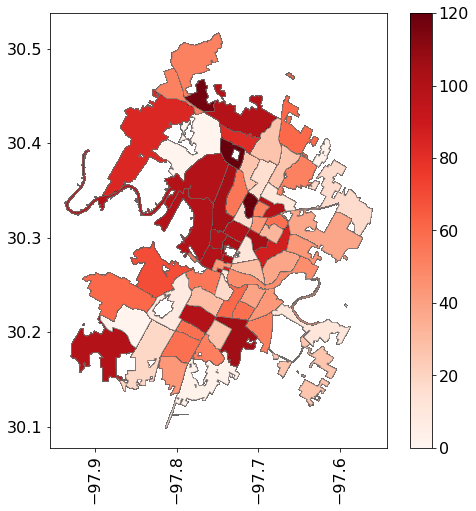

In [148]:
#Crime_type by zip_code
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
new_df.plot(column="crime_type", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
bar_info._A = []
cbar = fig.colorbar(bar_info)

# We predict that there is a relationship between higher seasonal levels of crime and clearance status.

In [16]:
train, validate, test = prepare.split_data(df)

In [17]:
train.shape

(197671, 26)

In [18]:
train2 = train.copy()

In [19]:
#df['occurrence_date']= pd.to_datetime(df['occurrence_date'])
train2 = train2.set_index('occurrence_time').sort_index()

In [20]:
#Split by month first
train2['month'] = train2.index.month_name()
train2['weekdays'] = train2.index.day_name()
train2['year'] = train2.index.year
train2['month_num']=train2.index.month

In [21]:
#train2.groupby(train2.occurrence_date.dt.month).crime_type.count().idxmax()

In [22]:
y = train2.groupby(['weekdays','year'])['crime_type'].count()

In [23]:
y

weekdays   year
Friday     2018    7613
           2019    8201
           2020    7535
           2021    6780
Monday     2018    7353
           2019    7452
           2020    7349
           2021    6385
Saturday   2018    7478
           2019    7698
           2020    7050
           2021    6204
Sunday     2018    7069
           2019    7536
           2020    6955
           2021    6111
Thursday   2018    7193
           2019    7160
           2020    7099
           2021    6103
Tuesday    2018    6994
           2019    7418
           2020    7205
           2021    6033
Wednesday  2018    7052
           2019    7101
           2020    7424
           2021    6120
Name: crime_type, dtype: int64

In [24]:
y_max = train2.groupby(['weekdays','year'])['crime_type'].count().max()

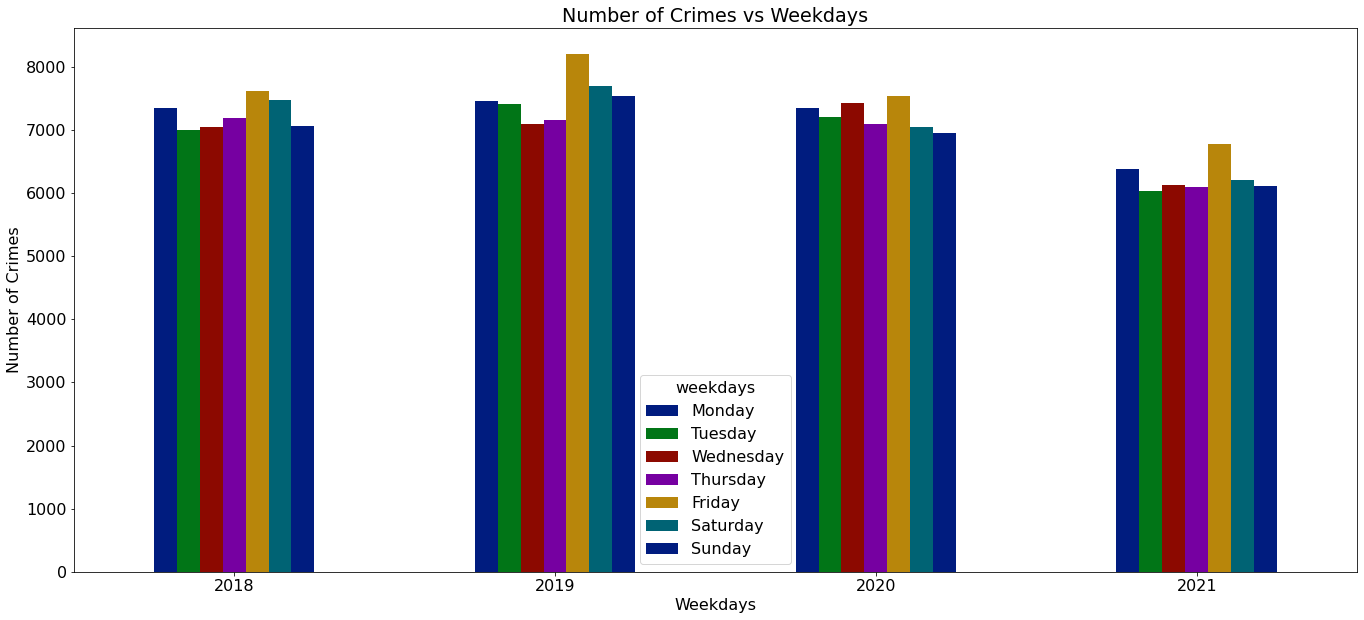

In [25]:
#Take a look at all the crime types
train2['weekdays'] = pd.Categorical(train2['weekdays'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#overall_mean = df.groupby('month').crime_type.value_counts()
#Assuming 0 = Sunday, 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 =Saturday
train2.groupby(['weekdays','year'])['crime_type'].count().unstack(0).plot.bar()
#sns.barplot(x=None, y = y, data = y, ci = None)
plt.title("Number of Crimes vs Weekdays")
plt.xlabel("Weekdays")
plt.ylabel("Number of Crimes")
plt.tick_params('x', rotation=360)
#plt.axhline(overall_mean,color="r")
None

In [26]:
friday_only = ['Friday']

In [27]:
subset_friday = train2.copy()

In [28]:
subset_friday = subset_friday[subset_friday.weekdays.isin(friday_only)]#With just friday only

In [29]:
subset_not_friday = train2.copy()

In [30]:
subset_not_friday = subset_not_friday[~subset_not_friday.weekdays.isin(friday_only)]#Without friday

### Stats Test

We'll be testing the following hypothesis:

$H_0$: There is no difference in crime levels between Fridays and other days of the week.
<br>
$H_a$: There is difference in crime levels between Fridays and other days of the week.

In [31]:
#Do 1 sample t-test compare friday vs the rest
#Need to subset the data just friday only and other exclude the friday and do 1 sample ttest
t_test_ind(subset_not_friday.cleared, subset_friday.cleared)

The t value between the two samples is 1.303 and the P-Value is 0.19244765792875587.
----------------------------------------------------------------------------
Since the P value is greater than the alpha, we fail to reject the null hypothesis.


In [32]:
train2.tail()

,crime_type,family_violence,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length,month,weekdays,year,month_num
occurrence_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-31 23:00:00,BURGLARY OF RESIDENCE,N,2021-12-31,2022-01-13 09:44:00,2022-01-13,RESIDENCE / HOME,2501 PARKER LN,78741.0,3.0,HENRY,30.229872,-97.738235,not cleared,2022-03-15,False,12 days 10:44:00,MULTIPOLYGON (((-97.728280447687 30.2474658449...,HENRY 2,205,1300,H1,SOUTH,SOUTHCENTRAL,5.956868e+07,45776.057157,December,Friday,2021,12
2021-12-31 23:40:00,AGG ASLT STRANGLE/SUFFOCATE,Y,2021-12-31,2022-01-01 00:44:00,2022-01-01,RESIDENCE / HOME,10000 N LAMAR BLVD,78758.0,4.0,EDWARD,30.369262,-97.695105,not cleared,2022-01-05,False,0 days 01:04:00,MULTIPOLYGON (((-97.694118479216 30.3826672092...,EDWARD 1,174,1288,E1,CENTRAL,NORTHEAST,8.356489e+07,46296.345268,December,Friday,2021,12
2021-12-31 23:47:00,DOC DISCHARGE GUN - PUB PLACE,N,2021-12-31,2021-12-31 23:47:00,2021-12-31,RESIDENCE / HOME,1202 E ST JOHNS AVE,78752.0,4.0,IDA,30.328049,-97.693683,not cleared,2022-01-05,False,0 days 00:00:00,MULTIPOLYGON (((-97.686350708439 30.3326013718...,IDA 1,215,1304,I1,CENTRAL,NORTHCENTRAL,2.469176e+07,20331.802851,December,Friday,2021,12
2021-12-31 23:50:00,THEFT,N,2021-12-31,2022-01-07 14:12:00,2022-01-07,OTHER / UNKNOWN,6936 E BEN WHITE BLVD SVRD WB,78741.0,3.0,HENRY,30.215264,-97.703019,not cleared,2022-01-10,False,6 days 14:22:00,MULTIPOLYGON (((-97.68027216016 30.24573035933...,HENRY 5,205,1302,H1,SOUTH,SOUTHCENTRAL,7.419049e+07,44745.588196,December,Friday,2021,12
2021-12-31 23:50:00,PUBLIC INTOXICATION,N,2021-12-31,2021-12-31 23:50:00,2021-12-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,406 E 6TH ST,78701.0,9.0,GEORGE,30.267300,-97.738857,cleared by arrest,2021-12-31,True,0 days 00:00:00,MULTIPOLYGON (((-97.735785029775 30.2641758809...,GEORGE 2,194,1297,G1,NORTH,DTAC,3.600168e+06,7922.102059,December,Friday,2021,12


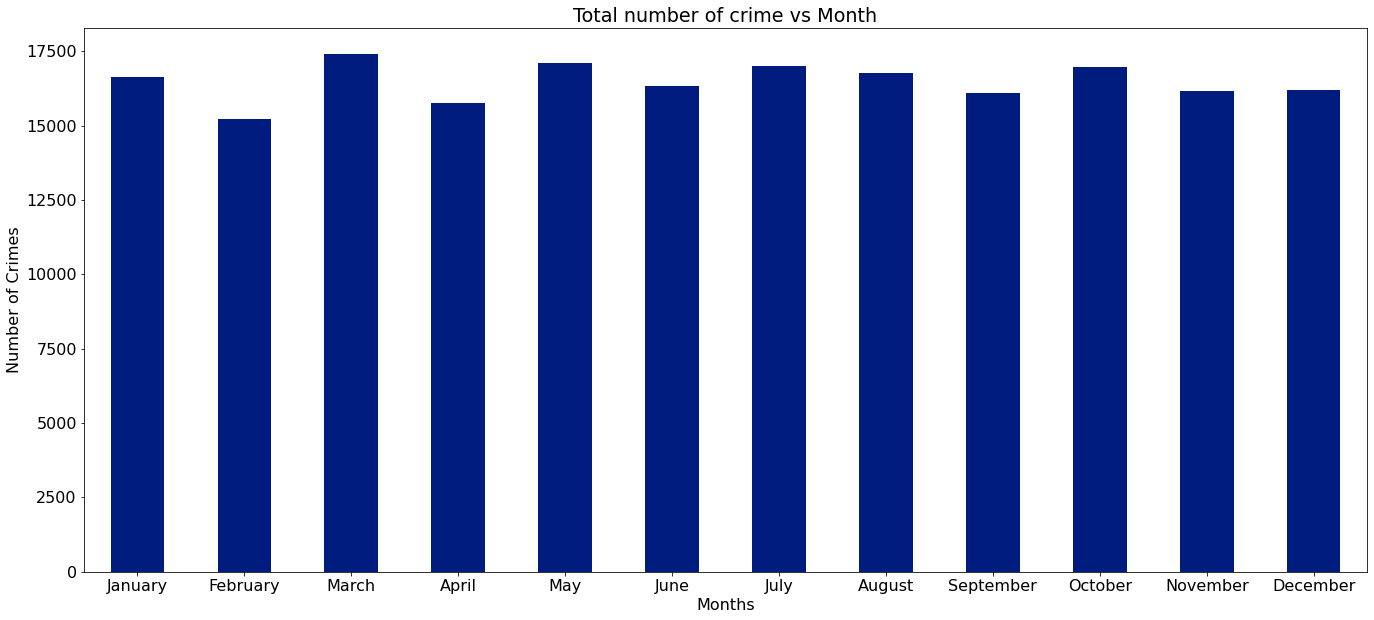

In [33]:
#Take a look at all the crime types
train2['month'] = pd.Categorical(train2['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                                            'September','October', 'November', 'December'])
#overall_mean = df.groupby('month').crime_type.value_counts()
train2.groupby('month').crime_type.count().plot.bar()
plt.title("Total number of crime vs Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.tick_params('x', rotation=360)
#plt.axhline(overall_mean,color="r")
None

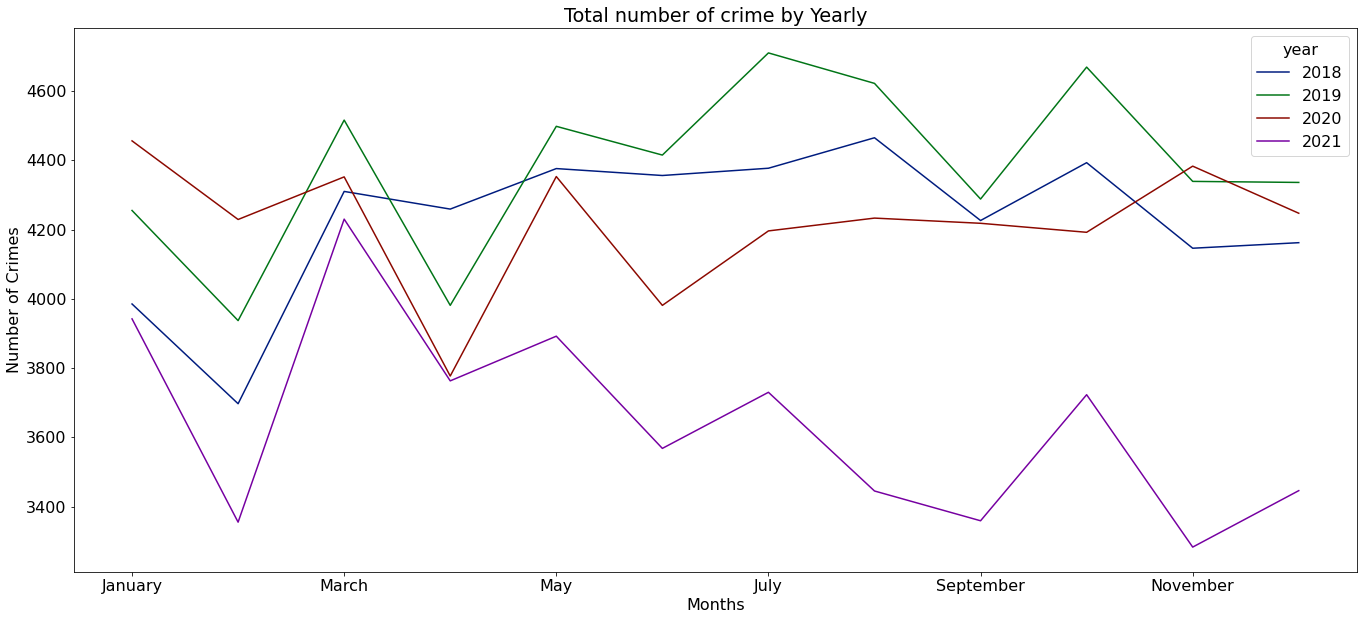

In [53]:
train2.groupby(['year', 'month']).cleared.count().unstack(0).plot.line()
plt.title("Total number of crime by Yearly")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.tick_params('x', rotation=360)
#plt.axhline(overall_mean,color="r")
None

#### Take away 
- From the visuals, we can see that Friday (2019) has higest, all the months have almost the same number of crime and year of 2019. But still need to take a look deeper into which weekday of the year has the higest number.

In [35]:
train2 ['report_hour'] = train2.index.hour

In [36]:
train2 = train2.astype({'report_hour':int}, errors='raise')

In [37]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197671 entries, 2018-01-01 00:00:00 to 2021-12-31 23:50:00
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   crime_type        197671 non-null  object         
 1   family_violence   197671 non-null  object         
 2   occurrence_date   197671 non-null  datetime64[ns] 
 3   report_time       197671 non-null  datetime64[ns] 
 4   report_date       197671 non-null  datetime64[ns] 
 5   location_type     197671 non-null  object         
 6   address           197671 non-null  object         
 7   zip_code          197671 non-null  float64        
 8   council_district  197671 non-null  float64        
 9   sector            197671 non-null  object         
 10  latitude          197671 non-null  float64        
 11  longitude         197671 non-null  float64        
 12  clearance_status  197671 non-null  object         
 13  clearance_

In [38]:
train2.report_hour.min

<bound method NDFrame._add_numeric_operations.<locals>.min of occurrence_time
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
2018-01-01 00:00:00     0
                       ..
2021-12-31 23:00:00    23
2021-12-31 23:40:00    23
2021-12-31 23:47:00    23
2021-12-31 23:50:00    23
2021-12-31 23:50:00    23
Name: report_hour, Length: 197671, dtype: int64>

In [59]:
#Create a 6 bins for hour
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [60]:
#Create sessons bins for clear of which season has more crime
def map_month(x):
    if (x > 1) and (x <= 3):
        return 'Spring'
    elif (x > 3) and (x <=7):
        return 'Summer'
    elif (x > 7) and (x <=10):
        return 'Fall'
    elif (x > 10) and (x <=12):
        return 'Winter'

In [41]:
train2['season'] = train2['month_num'].apply(map_month)

In [42]:
train2['report_hour_bins'] = train2['report_hour'].apply(f)

In [43]:
#train2 ['report_hour_bins'] = pd.cut(train2['report_hour'], bins = bins, labels = labels, right = False)
                                                    

In [120]:
train2.sample(10)

,crime_type,family_violence,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length,month,weekdays,year,month_num,report_hour,season,report_hour_bins
occurrence_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-14 02:47:00,AGG ASLT STRANGLE/SUFFOCATE,Y,2018-04-14,2018-04-14 03:49:00,2018-04-14,RESIDENCE / HOME,1917 WILLOW CREEK DR,78741.0,3.0,HENRY,30.233442,-97.727018,cleared by arrest,2018-04-14,True,0 days 01:02:00,MULTIPOLYGON (((-97.728280447687 30.2474658449...,HENRY 2,205,1300,H1,SOUTH,SOUTHCENTRAL,5.956868e+07,45776.057157,April,Saturday,2018,4,2,Summer,Late Night
2021-01-03 22:11:00,AGG ROBBERY/DEADLY WEAPON,N,2021-01-03,2021-01-03 23:03:00,2021-01-03,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,13490 BLOCK N US 183 HWY SVRD NB,78750.0,6.0,ADAM,30.446554,-97.789011,not cleared,2021-01-04,False,0 days 00:52:00,MULTIPOLYGON (((-97.766313673553 30.4663198555...,ADAM 4,21,1272,A1,NORTH,NORTHWEST,6.959435e+07,47235.701679,January,Sunday,2021,1,22,None,Night
2021-02-28 04:10:00,AUTO THEFT,N,2021-02-28,2021-02-28 04:10:00,2021-02-28,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,11900 HOBBY HORSE CT,78758.0,7.0,ADAM,30.404854,-97.713712,cleared by arrest,2021-03-03,True,0 days 00:00:00,MULTIPOLYGON (((-97.697570539954 30.4059761209...,ADAM 2,21,1273,A1,NORTH,NORTHWEST,7.158634e+07,47622.336711,February,Sunday,2021,2,4,Spring,Late Night
2018-11-08 20:52:00,PUBLIC INTOXICATION,N,2018-11-08,2018-11-08 20:52:00,2018-11-08,RESIDENCE / HOME,909 BIRD CREEK DR,78758.0,4.0,EDWARD,30.371026,-97.697169,cleared by arrest,2018-11-08,True,0 days 00:00:00,MULTIPOLYGON (((-97.694118479216 30.3826672092...,EDWARD 1,174,1288,E1,CENTRAL,NORTHEAST,8.356489e+07,46296.345268,November,Thursday,2018,11,20,Winter,Evening
2021-10-06 12:24:00,CRIMINAL TRESPASS/TRANSIENT,N,2021-10-06,2021-10-06 12:24:00,2021-10-06,ABANDONED/CONDEMNED STRUCTURE,2400 WICKERSHAM LN,78741.0,3.0,HENRY,30.227649,-97.723301,cleared by arrest,2021-10-31,True,0 days 00:00:00,MULTIPOLYGON (((-97.711351030891 30.2287459749...,HENRY 4,205,1300,H1,SOUTH,SOUTHCENTRAL,4.523399e+07,27115.487629,October,Wednesday,2021,10,12,Fall,Morning
2018-09-19 13:34:00,PUBLIC INTOXICATION,N,2018-09-19,2018-09-19 13:34:00,2018-09-19,SHOPPING MALL,800 W CESAR CHAVEZ ST,78701.0,9.0,GEORGE,30.266282,-97.752604,cleared by arrest,2018-09-24,True,0 days 00:00:00,MULTIPOLYGON (((-97.738825827496 30.2721112329...,GEORGE 1,194,1296,G1,NORTH,DTAC,1.649662e+07,22440.194852,September,Wednesday,2018,9,13,Fall,Noon
2018-08-18 07:03:00,ASSAULT WITH INJURY,N,2018-08-18,2018-08-18 07:03:00,2018-08-18,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,800 BLOCK N IH 35 SVRD SB,78701.0,9.0,CHARLIE,30.267836,-97.734347,not cleared,2018-08-29,False,0 days 00:00:00,MULTIPOLYGON (((-97.697914171742 30.2735607234...,CHARLIE 2,400,1279,CHAR,CENTRAL,CENTRALEAST,6.274782e+07,38265.126972,August,Saturday,2018,8,7,Fall,Early Morning
2019-05-23 01:45:00,BURGLARY OF VEHICLE,N,2019-05-23,2019-05-24 11:34:00,2019-05-24,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,E 12TH ST / RED RIVER ST,78701.0,1.0,GEORGE,30.272319,-97.735050,not cleared,2019-05-24,False,1 days 09:49:00,MULTIPOLYGON (((-97.738825827496 30.2721112329...,GEORGE 1,194,1296,G1,NORTH,DTAC,1.649662e+07,22440.194852,May,Thursday,2019,5,1,Summer,Late Night
2018-12-10 14:00:00,THEFT BY SHOPLIFTING,N,2018-12-10,2018-12-11 13:25:00,2018-12-11,COMMERCIAL / OFFICE BUILDING,5457 N IH 35 SVRD NB,78723.0,4.0,IDA,30.315454,-97.705012,not cleared,2018-12-12,False,0 days 23:25:00,MULTIPOLYGON (((-97.695338232528 30.3213427329...,IDA 5,215,1304,I1,CENTRAL,NORTHCENTRAL,2.777251e+07,21713.847311,December,Monday,2018,12,14,Winter,Noon


In [45]:
train2.report_hour_bins.value_counts()

Evening          44432
Late Night       36381
Noon             35690
Morning          33998
Night            31513
Early Morning    15657
Name: report_hour_bins, dtype: int64

<AxesSubplot:ylabel='weekdays'>

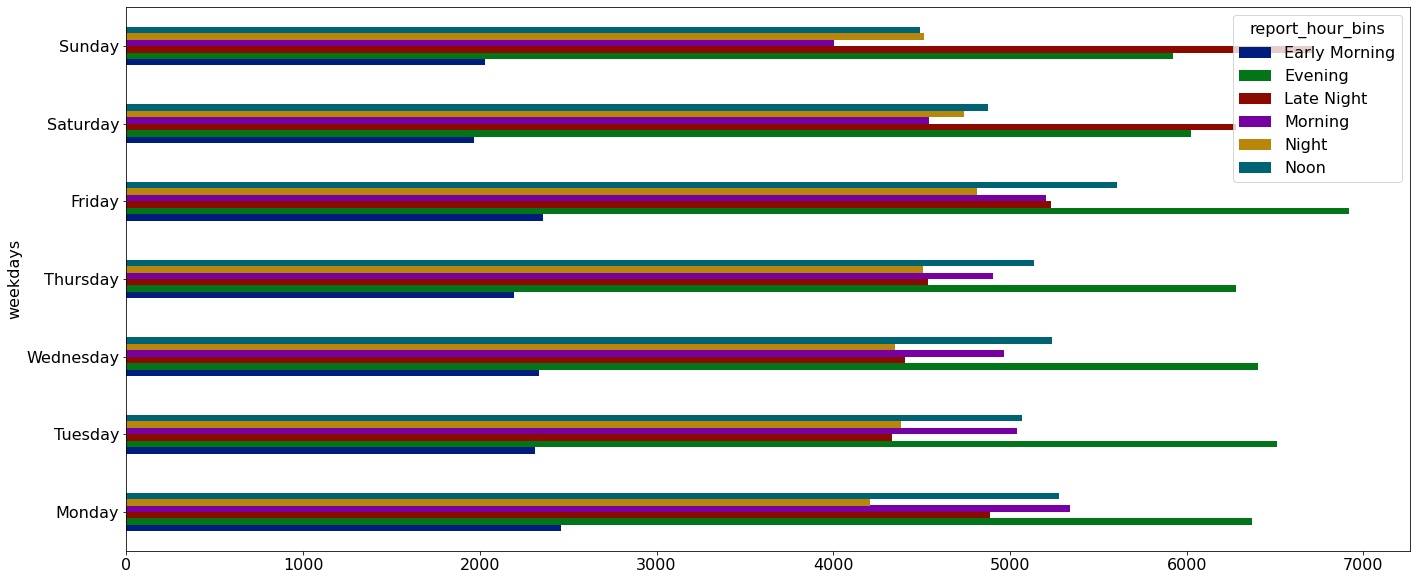

In [46]:
#Quick visual
train2.groupby(['report_hour_bins','weekdays']).clearance_status.count().unstack(0).plot.barh()

In [47]:
#Note: During the evening time there is more crime compare to late night. But which crime is more like to happen at that hour?

In [48]:
#Crime type by hourly that included cleared and not clear
train2.groupby(['weekdays','report_hour_bins','crime_type']).clearance_status.count().sort_values(ascending = False).head(50)

weekdays   report_hour_bins  crime_type         
Wednesday  Evening           BURGLARY OF VEHICLE    853
Tuesday    Evening           BURGLARY OF VEHICLE    831
Friday     Evening           BURGLARY OF VEHICLE    784
Thursday   Evening           BURGLARY OF VEHICLE    761
Monday     Evening           BURGLARY OF VEHICLE    742
Sunday     Evening           BURGLARY OF VEHICLE    654
Friday     Noon              THEFT                  637
Monday     Morning           THEFT                  615
Sunday     Night             BURGLARY OF VEHICLE    610
Friday     Morning           THEFT                  610
Thursday   Noon              THEFT                  608
Wednesday  Morning           THEFT                  603
Monday     Noon              THEFT                  599
Wednesday  Night             BURGLARY OF VEHICLE    597
Saturday   Evening           THEFT                  597
Wednesday  Noon              THEFT                  587
Tuesday    Morning           THEFT                  585

In [49]:
#Child custody interferseems alot during firday evening, come after that is identity theft

In [50]:
train2.cleared.mean()

0.2070561690890419

<AxesSubplot:ylabel='year'>

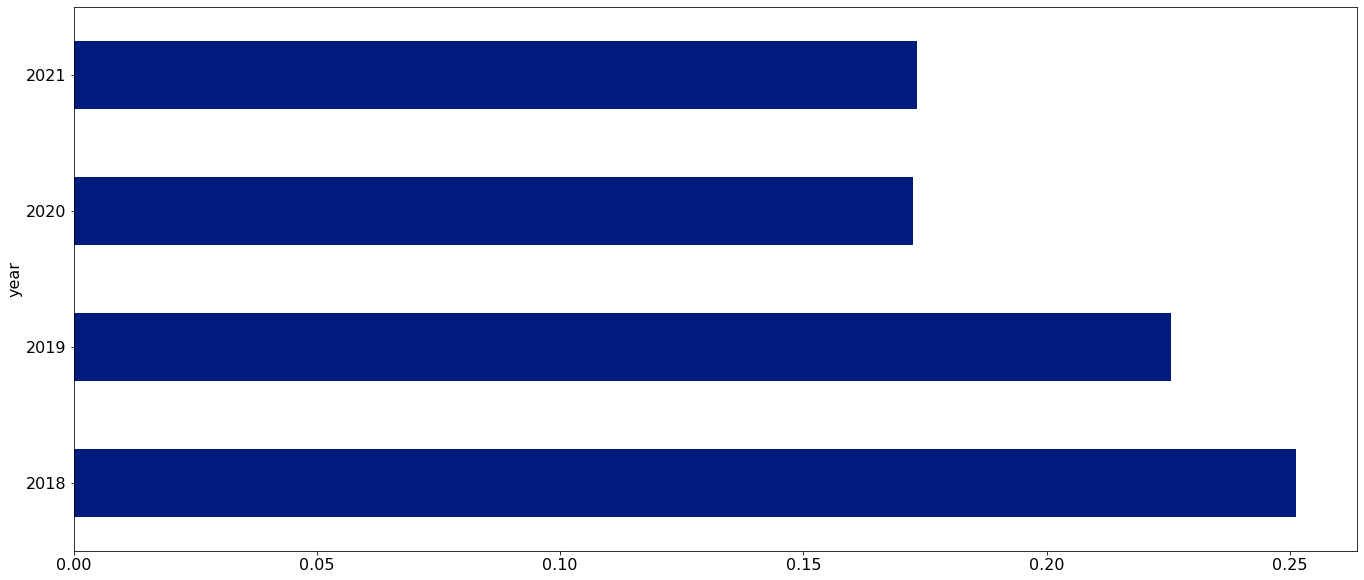

In [51]:
train2.groupby(['year']).cleared.mean().plot.barh()

In [52]:
top_10_list = ['DWI', 'ASSAULT WITH INJURY', 'THEFT BY SHOPLIFTING', 'HARASSMENT', 
                 'AUTO THEFT', 'ASSAULT W/INJURY-FAM/DATE VIOL', 'CRIMINAL MISCHIEF', 
                 'FAMILY DISTURBANCE', 'THEFT', 'BURGLARY OF VEHICLE']

train2['new_crime'] = train2.crime_list.apply(lambda x: [~i for i in top_10_list if i not in x])
#df['all_exclude_cat'] = df.cat.apply(lambda cat: list(set(all_catgs) - set(cat)))    

AttributeError: 'DataFrame' object has no attribute 'crime_list'

In [118]:
train2.head()

,crime_type,family_violence,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,latitude,longitude,clearance_status,clearance_date,cleared,time_to_report,the_geom,district_name,battalion_id,code,battalion_code,bureau_name,patrol_area,shape_area,shape_length,month,weekdays,year,month_num,report_hour,season,report_hour_bins
occurrence_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,THEFT,N,2018-01-01,2018-07-24 15:43:00,2018-07-24,PARKING /DROP LOT/ GARAGE,1030 NORWOOD PARK BLVD,78753.0,4.0,IDA,30.339152,-97.691166,not cleared,2018-07-25,False,204 days 15:43:00,MULTIPOLYGON (((-97.680571226059 30.3352758192...,IDA 2,215,1304,I1,CENTRAL,NORTHCENTRAL,4.113775e+07,34696.294289,January,Monday,2018,1,0,None,Late Night
2018-01-01,BURGLARY NON RESIDENCE,N,2018-01-01,2019-01-04 17:42:00,2019-01-04,OTHER / UNKNOWN,8101 N LAMAR BLVD NB,78753.0,4.0,EDWARD,30.349433,-97.710191,not cleared,2019-02-14,False,368 days 17:42:00,MULTIPOLYGON (((-97.694118479216 30.3826672092...,EDWARD 1,174,1288,E1,CENTRAL,NORTHEAST,8.356489e+07,46296.345268,January,Monday,2018,1,0,None,Late Night
2018-01-01,POSS OF FIREARM BY FELON,Y,2018-01-01,2018-01-31 13:09:00,2018-01-31,RESIDENCE / HOME,11513 FAST HORSE DR,78759.0,6.0,ADAM,30.411489,-97.741554,not cleared,2019-01-22,False,30 days 13:09:00,MULTIPOLYGON (((-97.697570539954 30.4059761209...,ADAM 2,21,1273,A1,NORTH,NORTHWEST,7.158634e+07,47622.336711,January,Monday,2018,1,0,None,Late Night
2018-01-01,FRAUD - OTHER,N,2018-01-01,2018-09-01 15:53:00,2018-09-01,RESIDENCE / HOME,1716 W ST JOHNS AVE,78757.0,7.0,IDA,30.344482,-97.729602,not cleared,2018-09-03,False,243 days 15:53:00,MULTIPOLYGON (((-97.723839441668 30.3719295278...,IDA 7,215,1305,I1,CENTRAL,NORTHCENTRAL,9.218470e+07,43885.566418,January,Monday,2018,1,0,None,Late Night
2018-01-01,THEFT,N,2018-01-01,2018-02-11 19:17:00,2018-02-11,RESIDENCE / HOME,8838 HONEYSUCKLE TRL,78759.0,10.0,BAKER,30.380626,-97.743507,not cleared,2018-02-12,False,41 days 19:17:00,MULTIPOLYGON (((-97.907735793673 30.3919223786...,BAKER 8,144,1276,B1,NORTH,CENTRALWEST,3.338738e+08,348970.649677,January,Monday,2018,1,0,None,Late Night


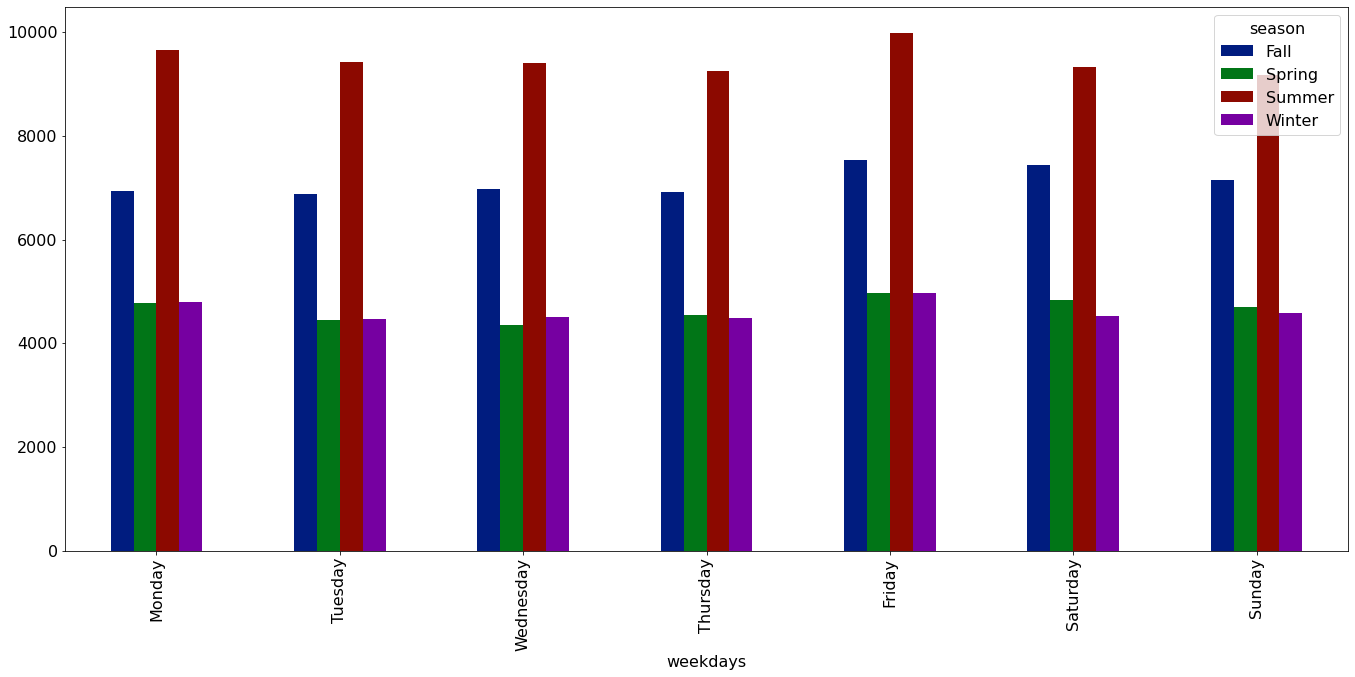

In [119]:
train2.groupby(['season', 'weekdays']).clearance_status.count().unstack(0).plot.bar();

<AxesSubplot:ylabel='patrol_area,occurrence_date,crime_type,cleared'>

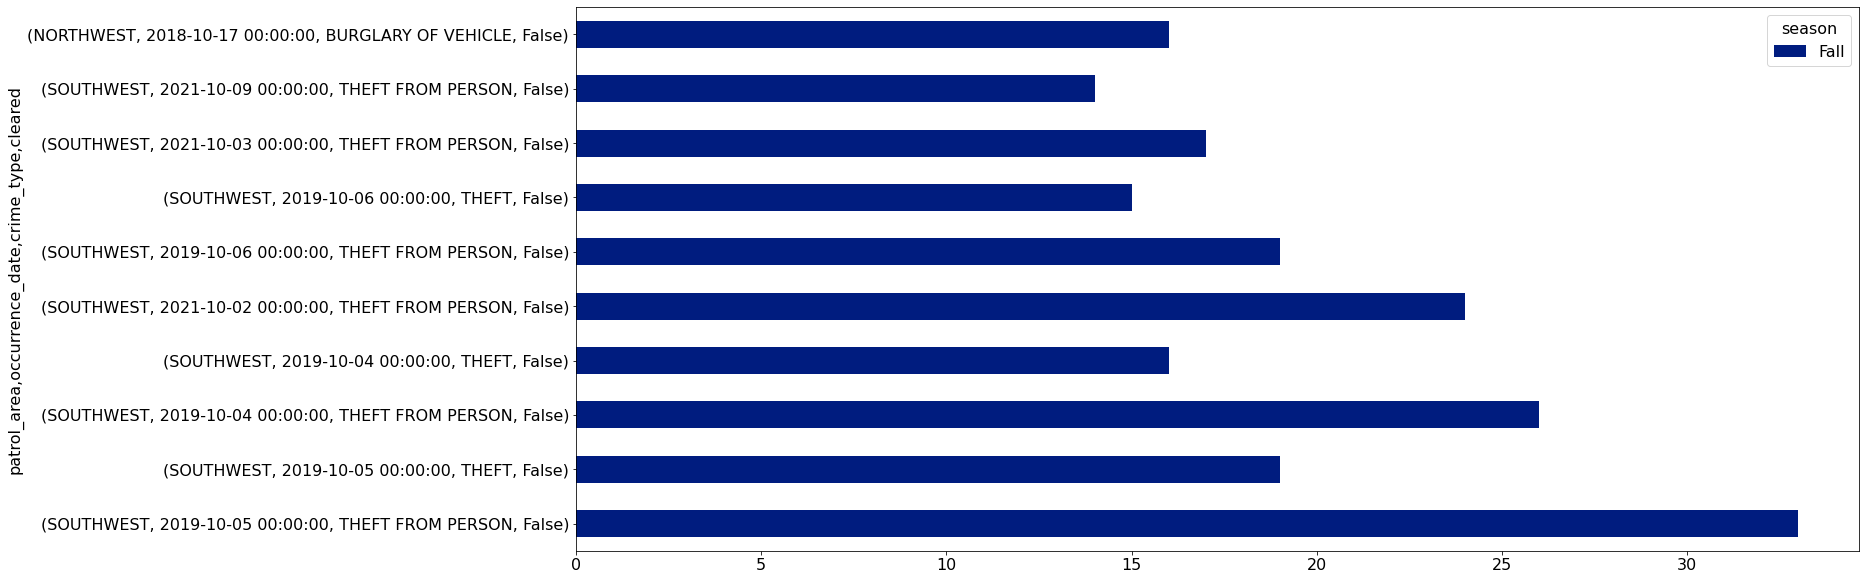

In [117]:
#Take a look at patrol area
#Keep in mind that True is the case is cleared and False is not clear
train2.groupby(['season','patrol_area','occurrence_date','crime_type','cleared']).clearance_status.count().sort_values(ascending=False).head(10).unstack(0).plot.barh()

In [58]:
#Interesting to see that in southwest, theft from person happned alot in the fall nearly 200 cases not been clear. 

In [122]:
season = ['Spring', 'Summer', 'Fall', 'Winter']

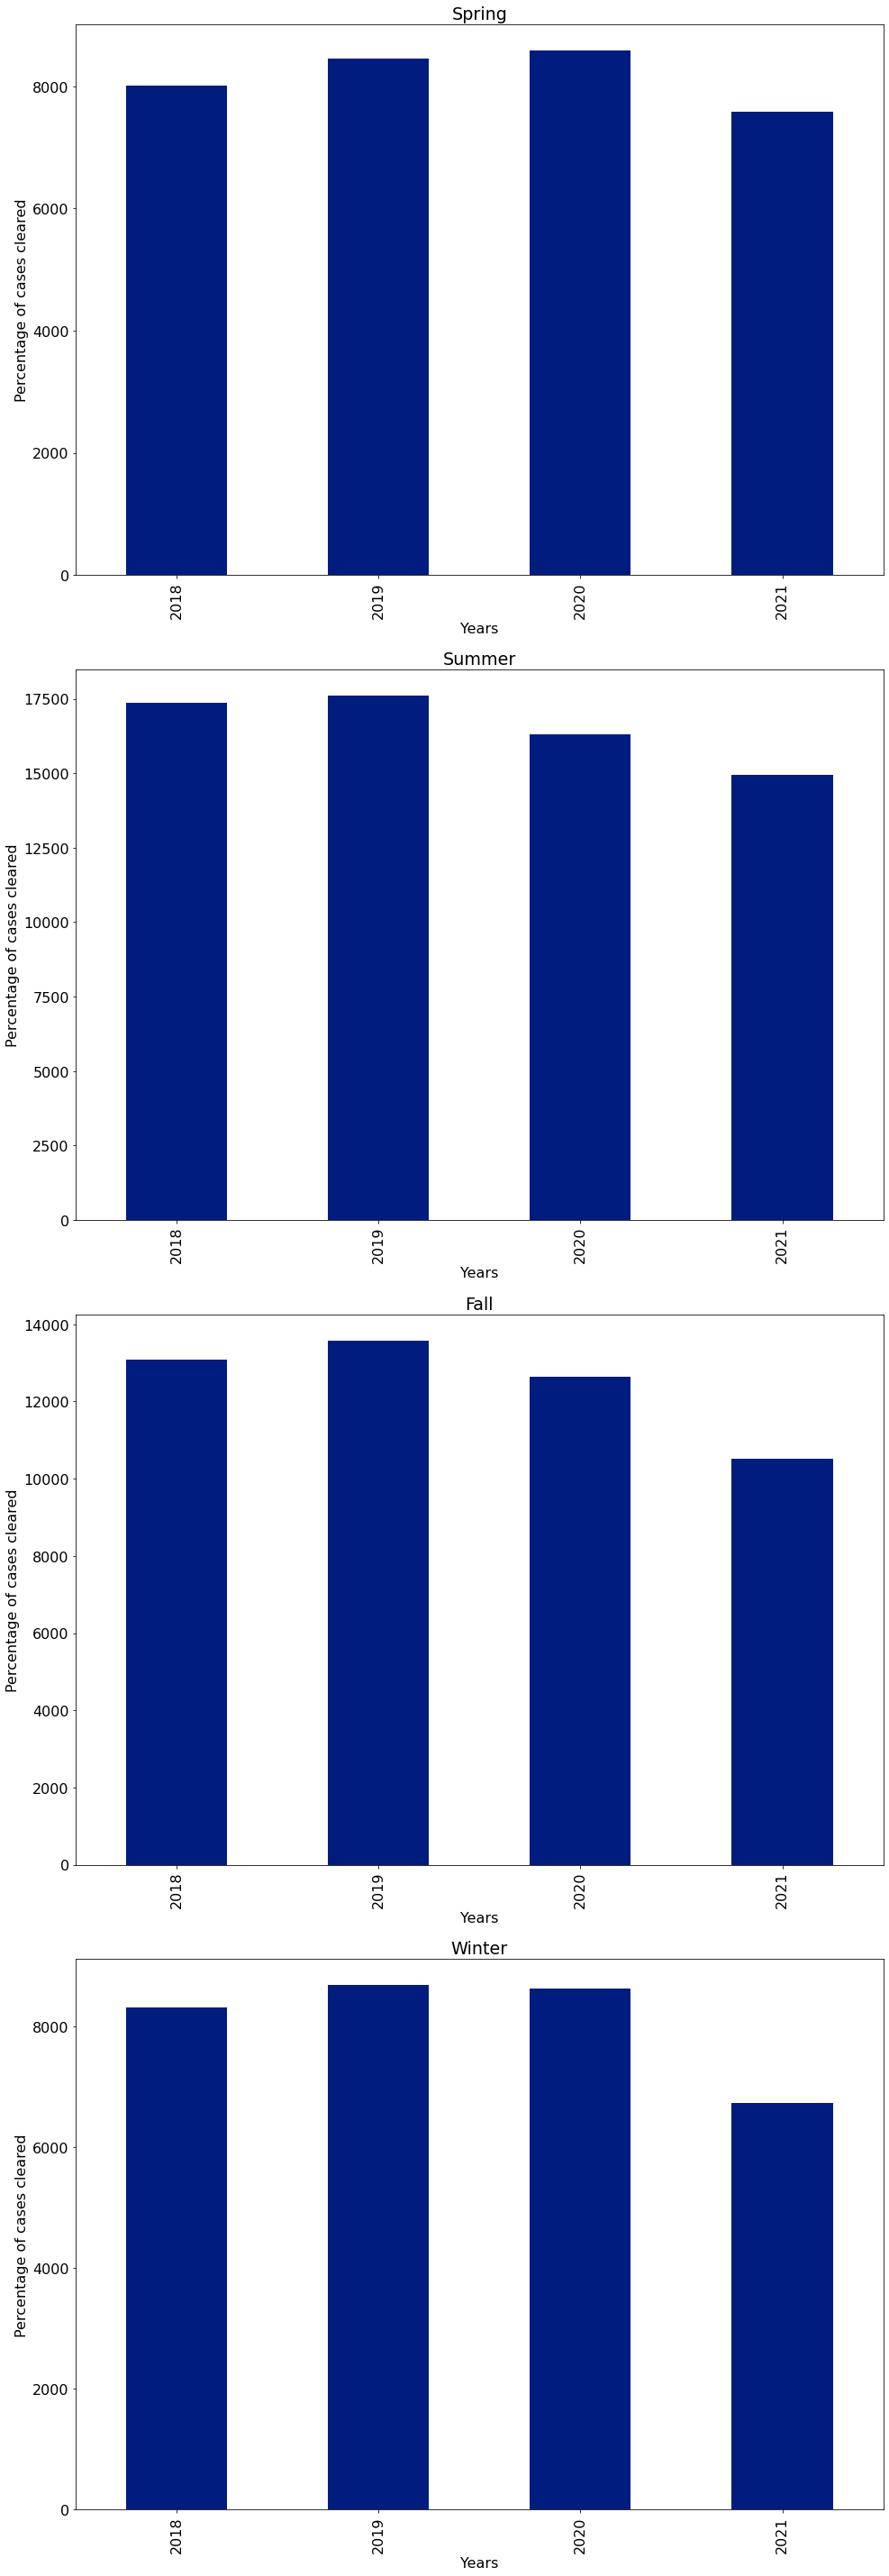

In [140]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (14, 40))

for index, crime_type in enumerate(season):
    # sns.barplot(
    #     data = train2[train2.season == crime_type],
    #     x = 'year',
    #     y = 'cleared',
    #     ci = None,
    #     ax = ax[index]
    # )
    
    train2[train2.season == crime_type].groupby('year').cleared.count().plot.bar(ax = ax[index])

    ax[index].set_xlabel('Years')
    ax[index].set_ylabel('Percentage of cases cleared')

    ax[index].set_title(crime_type)
    
plt.tight_layout();